<a href="https://colab.research.google.com/github/fshnkarimi/Labeling/blob/main/Buy%26Hold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import glob
from dateutil import parser

# Read dataframes
path = r'/content' 
all_files = glob.glob(path + "/*.csv")

df_dict = {}

for filename in all_files:
    key = filename.split('/')[len(filename.split('/')) -1 ].split('.')[0]
    df = pd.read_csv(filename, index_col=None, header=0)
    df_dict[key] = df


In [3]:
def buy_and_hold(df, InitialCapital):
    
    capital = InitialCapital
    stock = 0
    old_trend = new_trend = df.Label[0]
    final_capitals = []

    for i in range(df.Label.count()):
        new_trend = df.Label[i]
        
        if new_trend == 1 and capital != 0:
          # Buy
          stock = capital / df.Price[i]
          capital = 0
          df['Trade Signal'][i] = 'Buy'
          df['Number of Shares'][i] = "{0:0.2f}".format(stock)

        elif new_trend != old_trend and new_trend == 0:
            # sell
            if stock != 0:
                capital = stock * df.Price[i]
                stock = 0
                df['Trade Signal'][i] = 'Sell'
                df['Number of Shares'][i] = '0'
        else:
            if i != 0:
                df['Number of Shares'][i] = df['Number of Shares'][i-1] 

        if capital != 0:
            final_capitals.append(capital)
        else:
            final_capitals.append(stock * df.Price[i])

        old_trend = df.Label[i]
    
    df = df.assign(FinalCapital=pd.Series(final_capitals))
    return df

In [4]:
def ROR(df, InitialCapital):
    ROR_list = []
    for capital in df.FinalCapital:
        ror = (df.FinalCapital - InitialCapital)/ InitialCapital * 100
        ROR_list.append(ror)
    df = df.assign(ROR=pd.Series(df.FinalCapital - InitialCapital)/ InitialCapital * 100)
    return df

In [5]:
def DD(df):
    max_ror = max(df.ROR)
    DD_list = []
    for ror in df.ROR:
      DD_list.append(max_ror - ror)
    df = df.assign(DD=pd.Series(DD_list))
    return df

In [6]:
# Sharpe Ratio
def sharpe_ratio(df):
    R = df.ROR[-1:].values[0]
    sr = R / df.ROR.std()
    return sr

In [13]:
def metrics(df, InitialCapital):
    df = buy_and_hold(df, InitialCapital)
    df = ROR(df, InitialCapital)
    df = DD(df)
    MDD = max(df.DD)
    sr = sharpe_ratio(df)
    print(f"Sharpe Ratio = {sr} \n")
    print(f"MDD = {MDD} \n")
    return df

In [8]:
InitialCapital = 10e6
InitialCapital

10000000.0

In [17]:
def add_metrics(df, file_name, dataset_type = 'china'):
    date_col = 'DATE'
    close_col = 'closingprice'
    if dataset_type == 'crypto':
        date_col = 'Date'
        close_col = 'Price'
    data = {'Date': df[date_col], 'Price': df[close_col],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
    df_new = pd.DataFrame(data)

    metrics_ = metrics(df_new, InitialCapital)
    file_name = file_name + '_metrics.csv'
    metrics_.to_csv(file_name)
    print(metrics_.head())

# China_001

## LSTM

In [18]:
df = pd.read_csv('lstm_001.csv', index_col=None, header=0)
add_metrics(df, 'lstm_001')

Sharpe Ratio = 1.8237765427702168 

MDD = 116.35316328217817 

         Date    Price  Label  ...  FinalCapital       ROR          DD
0  2011-10-31  2468.25      1  ...  1.000000e+07  0.000000  110.488438
1  2011-11-01  2470.02      1  ...  1.000717e+07  0.071711  110.416727
2  2011-11-02  2504.11      1  ...  1.014529e+07  1.452851  109.035586
3  2011-11-03  2508.09      1  ...  1.016141e+07  1.614099  108.874339
4  2011-11-04  2528.29      1  ...  1.024325e+07  2.432493  108.055945

[5 rows x 8 columns]


## LSTM_beta

In [20]:
df = pd.read_csv('lstm_beta_001.csv', index_col=None, header=0)
add_metrics(df, 'lstm_beta_001')

Sharpe Ratio = 1.2205923167710364 

MDD = 111.2642665877932 

         Date    Price  Label  ... FinalCapital  ROR        DD
0  2011-12-15  2180.89      0  ...   10000000.0  0.0  83.75786
1  2011-12-16  2224.84      0  ...   10000000.0  0.0  83.75786
2  2011-12-19  2218.24      0  ...   10000000.0  0.0  83.75786
3  2011-12-20  2215.92      0  ...   10000000.0  0.0  83.75786
4  2011-12-21  2191.14      0  ...   10000000.0  0.0  83.75786

[5 rows x 8 columns]


## GRU

In [21]:
df = pd.read_csv('gru_001.csv', index_col=None, header=0)
add_metrics(df, 'gru_001')

Sharpe Ratio = 1.5513745946646078 

MDD = 136.35792748780406 

         Date    Price  Label  ...  FinalCapital       ROR          DD
0  2011-10-31  2468.25      1  ...  1.000000e+07  0.000000  129.598515
1  2011-11-01  2470.02      1  ...  1.000717e+07  0.071711  129.526804
2  2011-11-02  2504.11      1  ...  1.014529e+07  1.452851  128.145663
3  2011-11-03  2508.09      1  ...  1.016141e+07  1.614099  127.984416
4  2011-11-04  2528.29      1  ...  1.024325e+07  2.432493  127.166022

[5 rows x 8 columns]


## GRU_beta

In [22]:
df = pd.read_csv('gru_beta_001.csv', index_col=None, header=0)
add_metrics(df, 'gru_beta_001')

Sharpe Ratio = 1.6037816358601409 

MDD = 112.9492806817018 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2011-12-15  2180.89      0  ...   10000000.0  0.0  103.732527
1  2011-12-16  2224.84      0  ...   10000000.0  0.0  103.732527
2  2011-12-19  2218.24      0  ...   10000000.0  0.0  103.732527
3  2011-12-20  2215.92      0  ...   10000000.0  0.0  103.732527
4  2011-12-21  2191.14      0  ...   10000000.0  0.0  103.732527

[5 rows x 8 columns]


## SVM

In [23]:
df = pd.read_csv('svm_001.csv', index_col=None, header=0)
add_metrics(df, 'svm_001')

Sharpe Ratio = 2.008094490741153 

MDD = 137.8203941588056 

         Date    Price  Label  ...  FinalCapital       ROR          DD
0  2011-10-31  2468.25      1  ...  1.000000e+07  0.000000  129.844448
1  2011-11-01  2470.02      1  ...  1.000717e+07  0.071711  129.772737
2  2011-11-02  2504.11      1  ...  1.014529e+07  1.452851  128.391597
3  2011-11-03  2508.09      1  ...  1.016141e+07  1.614099  128.230349
4  2011-11-04  2528.29      1  ...  1.024325e+07  2.432493  127.411955

[5 rows x 8 columns]


## SVM_beta


In [24]:
df = pd.read_csv('svm_beta_001.csv', index_col=None, header=0)
add_metrics(df, 'svm_beta_001')

Sharpe Ratio = 1.5766596078058162 

MDD = 100.8300252248614 

         Date    Price  Label  ... FinalCapital  ROR         DD
0  2011-12-15  2180.89      0  ...   10000000.0  0.0  83.334653
1  2011-12-16  2224.84      0  ...   10000000.0  0.0  83.334653
2  2011-12-19  2218.24      0  ...   10000000.0  0.0  83.334653
3  2011-12-20  2215.92      0  ...   10000000.0  0.0  83.334653
4  2011-12-21  2191.14      0  ...   10000000.0  0.0  83.334653

[5 rows x 8 columns]


## XGBoost

In [25]:
df = pd.read_csv('xgboost_001.csv', index_col=None, header=0)
add_metrics(df, 'xgboost_001')

Sharpe Ratio = 1.669834474858571 

MDD = 84.75963455486735 

         Date    Price  Label  ...  FinalCapital       ROR         DD
0  2011-10-31  2468.25      1  ...  1.000000e+07  0.000000  73.015204
1  2011-11-01  2470.02      1  ...  1.000717e+07  0.071711  72.943493
2  2011-11-02  2504.11      1  ...  1.014529e+07  1.452851  71.562353
3  2011-11-03  2508.09      1  ...  1.016141e+07  1.614099  71.401105
4  2011-11-04  2528.29      1  ...  1.024325e+07  2.432493  70.582711

[5 rows x 8 columns]


## XGBoost_beta

In [26]:
df = pd.read_csv('xgboost_beta_001.csv', index_col=None, header=0)
add_metrics(df, 'xgboost_beta_001')

Sharpe Ratio = 1.43190441113367 

MDD = 105.79210039407826 

         Date    Price  Label  ... FinalCapital  ROR         DD
0  2011-12-15  2180.89      0  ...   10000000.0  0.0  88.225437
1  2011-12-16  2224.84      0  ...   10000000.0  0.0  88.225437
2  2011-12-19  2218.24      0  ...   10000000.0  0.0  88.225437
3  2011-12-20  2215.92      0  ...   10000000.0  0.0  88.225437
4  2011-12-21  2191.14      0  ...   10000000.0  0.0  88.225437

[5 rows x 8 columns]


## LR

In [27]:
df = pd.read_csv('001_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_001')

Sharpe Ratio = 2.8723561119887884 

MDD = 504.0746096624171 

         Date    Price  Label  ...  FinalCapital       ROR          DD
0  2003-03-25  1462.40      1  ...  1.000000e+07  0.000000  490.085649
1  2003-03-26  1456.27      0  ...  9.958083e+06 -0.419174  490.504823
2  2003-03-27  1499.34      1  ...  9.958083e+06 -0.419174  490.504823
3  2003-03-28  1491.93      1  ...  9.908868e+06 -0.911320  490.996969
4  2003-03-31  1510.56      1  ...  1.003260e+07  0.326019  489.759631

[5 rows x 8 columns]


## LR_beta

In [28]:
df = pd.read_csv('001_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_001_beta')

Sharpe Ratio = 2.9121576088740495 

MDD = 1176.2610267257692 

         Date    Price  Label  ...  FinalCapital       ROR           DD
0  2003-05-20  1535.52      1  ...  1.000000e+07  0.000000  1162.009869
1  2003-05-21  1533.48      0  ...  9.986715e+06 -0.132854  1162.142723
2  2003-05-22  1546.11      1  ...  9.986715e+06 -0.132854  1162.142723
3  2003-05-23  1560.95      1  ...  1.008257e+07  0.825699  1161.184170
4  2003-05-26  1569.51      1  ...  1.013786e+07  1.378611  1160.631258

[5 rows x 8 columns]


# China_004

## LSTM

In [29]:
df = pd.read_csv('004_lstm.csv', index_col=None, header=0)
add_metrics(df, '004_lstm')

Sharpe Ratio = 2.9911529840686732 

MDD = 3479.263943558332 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-06-13  79.4158      0  ...   10000000.0  0.0  3455.679791
1  2003-06-16  78.3286      0  ...   10000000.0  0.0  3455.679791
2  2003-06-17  77.8170      0  ...   10000000.0  0.0  3455.679791
3  2003-06-18  78.8402      0  ...   10000000.0  0.0  3455.679791
4  2003-06-19  78.3926      0  ...   10000000.0  0.0  3455.679791

[5 rows x 8 columns]


## LSTM_beta

In [30]:
df = pd.read_csv('004_lstm_beta.csv', index_col=None, header=0)
add_metrics(df, '004_lstm_beta')

Sharpe Ratio = 2.8158735146837626 

MDD = 1040.5289779658635 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1033.62289
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1033.62289
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1033.62289
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1033.62289
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1033.62289

[5 rows x 8 columns]


## GRU

In [31]:
df = pd.read_csv('004_gru.csv', index_col=None, header=0)
add_metrics(df, '004_gru')

Sharpe Ratio = 2.8017235502575875 

MDD = 1950.2052176039829 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-06-13  79.4158      0  ...   10000000.0  0.0  1909.782185
1  2003-06-16  78.3286      0  ...   10000000.0  0.0  1909.782185
2  2003-06-17  77.8170      0  ...   10000000.0  0.0  1909.782185
3  2003-06-18  78.8402      0  ...   10000000.0  0.0  1909.782185
4  2003-06-19  78.3926      0  ...   10000000.0  0.0  1909.782185

[5 rows x 8 columns]


## GRU_beta

In [32]:
df = pd.read_csv('004_gru_beta.csv', index_col=None, header=0)
add_metrics(df, '004_gru_beta')

Sharpe Ratio = 2.737996526420651 

MDD = 1079.9427009698948 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1076.31648
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1076.31648
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1076.31648
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1076.31648
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1076.31648

[5 rows x 8 columns]


## SVM

In [33]:
df = pd.read_csv('004_svm.csv', index_col=None, header=0)
add_metrics(df, '004_svm')

Sharpe Ratio = 2.910573124595708 

MDD = 2149.8041751755927 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-06-13  79.4158      0  ...   10000000.0  0.0  2111.914597
1  2003-06-16  78.3286      0  ...   10000000.0  0.0  2111.914597
2  2003-06-17  77.8170      0  ...   10000000.0  0.0  2111.914597
3  2003-06-18  78.8402      0  ...   10000000.0  0.0  2111.914597
4  2003-06-19  78.3926      0  ...   10000000.0  0.0  2111.914597

[5 rows x 8 columns]


## SVM_beta


In [34]:
df = pd.read_csv('004_svm_beta.csv', index_col=None, header=0)
add_metrics(df, '004_svm_beta')

Sharpe Ratio = 2.7865536307649763 

MDD = 1563.3415285946514 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1558.145725
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1558.145725
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1558.145725
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1558.145725
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1558.145725

[5 rows x 8 columns]


## XGBoost

In [35]:
df = pd.read_csv('004_xgboost.csv', index_col=None, header=0)
add_metrics(df, '004_xgboost')

Sharpe Ratio = 2.807024138378604 

MDD = 2552.1432957433826 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-06-13  79.4158      0  ...   10000000.0  0.0  2511.300522
1  2003-06-16  78.3286      0  ...   10000000.0  0.0  2511.300522
2  2003-06-17  77.8170      0  ...   10000000.0  0.0  2511.300522
3  2003-06-18  78.8402      0  ...   10000000.0  0.0  2511.300522
4  2003-06-19  78.3926      0  ...   10000000.0  0.0  2511.300522

[5 rows x 8 columns]


## XGBoost_beta

In [36]:
df = pd.read_csv('004_xgboost_beta.csv', index_col=None, header=0)
add_metrics(df, '004_xgboost_beta')

Sharpe Ratio = 2.6698690956781057 

MDD = 1694.522293280293 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1688.235383
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1688.235383
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1688.235383
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1688.235383
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1688.235383

[5 rows x 8 columns]


## LR

In [37]:
df = pd.read_csv('004_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_004')

Sharpe Ratio = 2.9509008690980836 

MDD = 4792.646823416587 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-06-13  79.4158      0  ...   10000000.0  0.0  4744.329187
1  2003-06-16  78.3286      0  ...   10000000.0  0.0  4744.329187
2  2003-06-17  77.8170      0  ...   10000000.0  0.0  4744.329187
3  2003-06-18  78.8402      0  ...   10000000.0  0.0  4744.329187
4  2003-06-19  78.3926      0  ...   10000000.0  0.0  4744.329187

[5 rows x 8 columns]


## LR_beta

In [38]:
df = pd.read_csv('004_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_004_beta')

Sharpe Ratio = 2.7450131590315654 

MDD = 3199.0389762691657 

         Date    Price  Label  ...  FinalCapital           ROR           DD
0  2003-07-30  69.9506      0  ...  1.000000e+07  0.000000e+00  3152.459598
1  2003-07-31  70.1425      0  ...  1.000000e+07  0.000000e+00  3152.459598
2  2003-08-01  74.1076      1  ...  1.000000e+07  1.862645e-14  3152.459598
3  2003-08-04  79.1600      1  ...  1.068177e+07  6.817654e+00  3145.641944
4  2003-08-05  73.5321      1  ...  9.922343e+06 -7.765735e-01  3153.236172

[5 rows x 8 columns]


# China_601

## LSTM

In [39]:
df = pd.read_csv('601_lstm.csv', index_col=None, header=0)
add_metrics(df, '601_lstm')

Sharpe Ratio = 2.2901708093345574 

MDD = 761.4968215734048 

         Date       Price  Label  ... FinalCapital  ROR          DD
0  2003-07-16  20004.6196      0  ...   10000000.0  0.0  743.531967
1  2003-07-17  19131.2193      0  ...   10000000.0  0.0  743.531967
2  2003-07-18  18548.9524      0  ...   10000000.0  0.0  743.531967
3  2003-07-21  18476.1691      0  ...   10000000.0  0.0  743.531967
4  2003-07-22  19301.0472      0  ...   10000000.0  0.0  743.531967

[5 rows x 8 columns]


## LSTM_beta

In [40]:
df = pd.read_csv('601_lstm_beta.csv', index_col=None, header=0)
add_metrics(df, '601_lstm_beta')

Sharpe Ratio = 1.4072402263510502 

MDD = 591.9178440124917 

         Date       Price  Label  ... FinalCapital  ROR          DD
0  2003-09-01  17845.3800      0  ...   10000000.0  0.0  580.928113
1  2003-09-02  17699.8132      0  ...   10000000.0  0.0  580.928113
2  2003-09-03  17287.3742      0  ...   10000000.0  0.0  580.928113
3  2003-09-04  17117.5464      0  ...   10000000.0  0.0  580.928113
4  2003-09-05  16899.1963      0  ...   10000000.0  0.0  580.928113

[5 rows x 8 columns]


## GRU

In [41]:
df = pd.read_csv('601_gru.csv', index_col=None, header=0)
add_metrics(df, '601_gru')

Sharpe Ratio = 1.8013698808518208 

MDD = 562.1063200210488 

         Date       Price  Label  ... FinalCapital  ROR         DD
0  2003-07-16  20004.6196      0  ...   10000000.0  0.0  527.78887
1  2003-07-17  19131.2193      0  ...   10000000.0  0.0  527.78887
2  2003-07-18  18548.9524      0  ...   10000000.0  0.0  527.78887
3  2003-07-21  18476.1691      0  ...   10000000.0  0.0  527.78887
4  2003-07-22  19301.0472      0  ...   10000000.0  0.0  527.78887

[5 rows x 8 columns]


## GRU_beta

In [42]:
df = pd.read_csv('601_gru_beta.csv', index_col=None, header=0)
add_metrics(df, '601_gru_beta')

Sharpe Ratio = 0.6816036192446308 

MDD = 446.72306988301926 

         Date       Price  Label  ... FinalCapital  ROR          DD
0  2003-09-01  17845.3800      0  ...   10000000.0  0.0  411.493651
1  2003-09-02  17699.8132      0  ...   10000000.0  0.0  411.493651
2  2003-09-03  17287.3742      0  ...   10000000.0  0.0  411.493651
3  2003-09-04  17117.5464      0  ...   10000000.0  0.0  411.493651
4  2003-09-05  16899.1963      0  ...   10000000.0  0.0  411.493651

[5 rows x 8 columns]


## SVM

In [43]:
df = pd.read_csv('601_svm.csv', index_col=None, header=0)
add_metrics(df, '601_svm')

Sharpe Ratio = 1.7562587129247045 

MDD = 548.0523296975447 

         Date       Price  Label  ... FinalCapital  ROR          DD
0  2003-07-16  20004.6196      0  ...   10000000.0  0.0  498.956533
1  2003-07-17  19131.2193      0  ...   10000000.0  0.0  498.956533
2  2003-07-18  18548.9524      0  ...   10000000.0  0.0  498.956533
3  2003-07-21  18476.1691      0  ...   10000000.0  0.0  498.956533
4  2003-07-22  19301.0472      0  ...   10000000.0  0.0  498.956533

[5 rows x 8 columns]


## SVM_beta


In [44]:
df = pd.read_csv('601_svm_beta.csv', index_col=None, header=0)
add_metrics(df, '601_svm_beta')

Sharpe Ratio = 2.5568715971025466 

MDD = 1491.8948084979334 

         Date       Price  Label  ... FinalCapital  ROR           DD
0  2003-09-01  17845.3800      0  ...   10000000.0  0.0  1479.969609
1  2003-09-02  17699.8132      0  ...   10000000.0  0.0  1479.969609
2  2003-09-03  17287.3742      0  ...   10000000.0  0.0  1479.969609
3  2003-09-04  17117.5464      0  ...   10000000.0  0.0  1479.969609
4  2003-09-05  16899.1963      0  ...   10000000.0  0.0  1479.969609

[5 rows x 8 columns]


## XGBoost

In [45]:
df = pd.read_csv('601_xgboost.csv', index_col=None, header=0)
add_metrics(df, '601_xgboost')

Sharpe Ratio = 1.8823367908924016 

MDD = 954.5447488767664 

         Date       Price  Label  ... FinalCapital  ROR          DD
0  2003-07-16  20004.6196      0  ...   10000000.0  0.0  924.190242
1  2003-07-17  19131.2193      0  ...   10000000.0  0.0  924.190242
2  2003-07-18  18548.9524      0  ...   10000000.0  0.0  924.190242
3  2003-07-21  18476.1691      0  ...   10000000.0  0.0  924.190242
4  2003-07-22  19301.0472      0  ...   10000000.0  0.0  924.190242

[5 rows x 8 columns]


## XGBoost_beta

In [46]:
df = pd.read_csv('601_xgboost_beta.csv', index_col=None, header=0)
add_metrics(df, '601_xgboost_beta')

Sharpe Ratio = 1.5567870669760167 

MDD = 695.2260923424001 

         Date       Price  Label  ... FinalCapital  ROR          DD
0  2003-09-01  17845.3800      0  ...   10000000.0  0.0  666.474812
1  2003-09-02  17699.8132      0  ...   10000000.0  0.0  666.474812
2  2003-09-03  17287.3742      0  ...   10000000.0  0.0  666.474812
3  2003-09-04  17117.5464      0  ...   10000000.0  0.0  666.474812
4  2003-09-05  16899.1963      0  ...   10000000.0  0.0  666.474812

[5 rows x 8 columns]


## LR

In [47]:
df = pd.read_csv('601_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_601')

Sharpe Ratio = 1.483156891764616 

MDD = 508.29976298382746 

         Date       Price  Label  ... FinalCapital  ROR          DD
0  2003-07-16  20004.6196      0  ...   10000000.0  0.0  465.865932
1  2003-07-17  19131.2193      0  ...   10000000.0  0.0  465.865932
2  2003-07-18  18548.9524      0  ...   10000000.0  0.0  465.865932
3  2003-07-21  18476.1691      0  ...   10000000.0  0.0  465.865932
4  2003-07-22  19301.0472      0  ...   10000000.0  0.0  465.865932

[5 rows x 8 columns]


## LR_beta

In [48]:
df = pd.read_csv('601_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_601_beta')

Sharpe Ratio = 1.2713764362184303 

MDD = 1311.4885018422613 

         Date       Price  Label  ... FinalCapital  ROR           DD
0  2003-09-01  17845.3800      0  ...   10000000.0  0.0  1301.007162
1  2003-09-02  17699.8132      0  ...   10000000.0  0.0  1301.007162
2  2003-09-03  17287.3742      0  ...   10000000.0  0.0  1301.007162
3  2003-09-04  17117.5464      0  ...   10000000.0  0.0  1301.007162
4  2003-09-05  16899.1963      0  ...   10000000.0  0.0  1301.007162

[5 rows x 8 columns]


# China_615

## LSTM

In [49]:
df = pd.read_csv('615_lstm.csv', index_col=None, header=0)
add_metrics(df, '615_lstm')

Sharpe Ratio = 1.5830842802287217 

MDD = 2205.1930625590016 

         Date     Price  Label  ...  FinalCapital       ROR           DD
0  2005-10-14  114.7250      0  ...  1.000000e+07  0.000000  2182.828255
1  2005-10-17  123.0479      1  ...  1.000000e+07  0.000000  2182.828255
2  2005-10-18  123.4860      1  ...  1.003560e+07  0.356040  2182.472214
3  2005-10-19  119.5435      1  ...  9.715200e+06 -2.847997  2185.676251
4  2005-10-20  112.5348      0  ...  9.145609e+06 -8.543909  2191.372163

[5 rows x 8 columns]


## LSTM_beta

In [50]:
df = pd.read_csv('615_lstm_beta.csv', index_col=None, header=0)
add_metrics(df, '615_lstm_beta')

Sharpe Ratio = 1.9740018952437803 

MDD = 6224.457183685773 

         Date     Price  Label  ...  FinalCapital        ROR           DD
0  2005-11-30   99.8314      1  ...  1.000000e+07   0.000000  6208.660751
1  2005-12-01  101.5836      1  ...  1.017552e+07   1.755159  6206.905592
2  2005-12-02   91.5084      1  ...  9.166294e+06  -8.337056  6216.997807
3  2005-12-05   84.0616      0  ...  8.420357e+06 -15.796433  6224.457184
4  2005-12-06   84.9377      1  ...  8.420357e+06 -15.796433  6224.457184

[5 rows x 8 columns]


## GRU

In [51]:
df = pd.read_csv('615_gru.csv', index_col=None, header=0)
add_metrics(df, '615_gru')

Sharpe Ratio = 1.7629984077715668 

MDD = 671.060424496522 

         Date     Price  Label  ...  FinalCapital       ROR          DD
0  2005-10-14  114.7250      0  ...  1.000000e+07  0.000000  635.183514
1  2005-10-17  123.0479      1  ...  1.000000e+07  0.000000  635.183514
2  2005-10-18  123.4860      1  ...  1.003560e+07  0.356040  634.827474
3  2005-10-19  119.5435      1  ...  9.715200e+06 -2.847997  638.031511
4  2005-10-20  112.5348      0  ...  9.145609e+06 -8.543909  643.727423

[5 rows x 8 columns]


## GRU_beta

In [52]:
df = pd.read_csv('615_gru_beta.csv', index_col=None, header=0)
add_metrics(df, '615_gru_beta')

Sharpe Ratio = 2.006560372157004 

MDD = 2359.3624357905164 

         Date     Price  Label  ...  FinalCapital       ROR           DD
0  2005-11-30   99.8314      1  ...  1.000000e+07  0.000000  2342.751187
1  2005-12-01  101.5836      1  ...  1.017552e+07  1.755159  2340.996027
2  2005-12-02   91.5084      0  ...  9.166294e+06 -8.337056  2351.088243
3  2005-12-05   84.0616      0  ...  9.166294e+06 -8.337056  2351.088243
4  2005-12-06   84.9377      0  ...  9.166294e+06 -8.337056  2351.088243

[5 rows x 8 columns]


## SVM

In [53]:
df = pd.read_csv('615_svm.csv', index_col=None, header=0)
add_metrics(df, '615_svm')

Sharpe Ratio = 1.4863038312721408 

MDD = 3062.709266760024 

         Date     Price  Label  ...  FinalCapital       ROR           DD
0  2005-10-14  114.7250      0  ...  1.000000e+07  0.000000  3047.596179
1  2005-10-17  123.0479      1  ...  1.000000e+07  0.000000  3047.596179
2  2005-10-18  123.4860      1  ...  1.003560e+07  0.356040  3047.240139
3  2005-10-19  119.5435      1  ...  9.715200e+06 -2.847997  3050.444176
4  2005-10-20  112.5348      0  ...  9.145609e+06 -8.543909  3056.140087

[5 rows x 8 columns]


## SVM_beta


In [54]:
df = pd.read_csv('615_svm_beta.csv', index_col=None, header=0)
add_metrics(df, '615_svm_beta')

Sharpe Ratio = 1.4605186273873196 

MDD = 2310.8477893728827 

         Date     Price  Label  ...  FinalCapital        ROR           DD
0  2005-11-30   99.8314      1  ...  1.000000e+07   0.000000  2271.795647
1  2005-12-01  101.5836      1  ...  1.017552e+07   1.755159  2270.040488
2  2005-12-02   91.5084      1  ...  9.166294e+06  -8.337056  2280.132704
3  2005-12-05   84.0616      1  ...  8.420357e+06 -15.796433  2287.592080
4  2005-12-06   84.9377      1  ...  8.508115e+06 -14.918853  2286.714501

[5 rows x 8 columns]


## XGBoost

In [55]:
df = pd.read_csv('615_xgboost.csv', index_col=None, header=0)
add_metrics(df, '615_xgboost')

Sharpe Ratio = 1.560369595443859 

MDD = 5460.749695363287 

         Date     Price  Label  ...  FinalCapital       ROR           DD
0  2005-10-14  114.7250      0  ...  1.000000e+07  0.000000  5436.709210
1  2005-10-17  123.0479      1  ...  1.000000e+07  0.000000  5436.709210
2  2005-10-18  123.4860      1  ...  1.003560e+07  0.356040  5436.353170
3  2005-10-19  119.5435      1  ...  9.715200e+06 -2.847997  5439.557206
4  2005-10-20  112.5348      0  ...  9.145609e+06 -8.543909  5445.253118

[5 rows x 8 columns]


## XGBoost_beta

In [56]:
df = pd.read_csv('615_xgboost_beta.csv', index_col=None, header=0)
add_metrics(df, '615_xgboost_beta')

Sharpe Ratio = 2.115968709420169 

MDD = 2552.8461830216384 

         Date     Price  Label  ...  FinalCapital        ROR           DD
0  2005-11-30   99.8314      1  ...  1.000000e+07   0.000000  2533.434303
1  2005-12-01  101.5836      1  ...  1.017552e+07   1.755159  2531.679144
2  2005-12-02   91.5084      1  ...  9.166294e+06  -8.337056  2541.771359
3  2005-12-05   84.0616      0  ...  8.420357e+06 -15.796433  2549.230736
4  2005-12-06   84.9377      0  ...  8.420357e+06 -15.796433  2549.230736

[5 rows x 8 columns]


## LR

In [57]:
df = pd.read_csv('615_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_615')

Sharpe Ratio = 1.280479945280852 

MDD = 20327.292501913344 

         Date     Price  Label  ...  FinalCapital       ROR            DD
0  2005-10-14  114.7250      0  ...  1.000000e+07  0.000000  20310.244054
1  2005-10-17  123.0479      1  ...  1.000000e+07  0.000000  20310.244054
2  2005-10-18  123.4860      1  ...  1.003560e+07  0.356040  20309.888014
3  2005-10-19  119.5435      0  ...  9.715200e+06 -2.847997  20313.092051
4  2005-10-20  112.5348      0  ...  9.715200e+06 -2.847997  20313.092051

[5 rows x 8 columns]


## LR_beta

In [58]:
df = pd.read_csv('615_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_615_beta')

Sharpe Ratio = 1.5937815113353888 

MDD = 2466.8016047012225 

         Date     Price  Label  ...  FinalCapital        ROR           DD
0  2005-11-30   99.8314      1  ...  1.000000e+07   0.000000  2428.485531
1  2005-12-01  101.5836      1  ...  1.017552e+07   1.755159  2426.730372
2  2005-12-02   91.5084      1  ...  9.166294e+06  -8.337056  2436.822588
3  2005-12-05   84.0616      1  ...  8.420357e+06 -15.796433  2444.281964
4  2005-12-06   84.9377      1  ...  8.508115e+06 -14.918853  2443.404385

[5 rows x 8 columns]


# China_9001

## LSTM

In [59]:
df = pd.read_csv('9001_lstm.csv', index_col=None, header=0)
add_metrics(df, '9001_lstm')

Sharpe Ratio = 2.6238654958149947 

MDD = 522.8807398997913 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2003-06-05  3433.27      0  ...   10000000.0  0.0  514.519797
1  2003-06-06  3362.30      0  ...   10000000.0  0.0  514.519797
2  2003-06-09  3327.97      0  ...   10000000.0  0.0  514.519797
3  2003-06-10  3347.61      0  ...   10000000.0  0.0  514.519797
4  2003-06-11  3411.09      0  ...   10000000.0  0.0  514.519797

[5 rows x 8 columns]


## LSTM_beta

In [60]:
df = pd.read_csv('9001_lstm_beta.csv', index_col=None, header=0)
add_metrics(df, '9001_lstm_beta')

Sharpe Ratio = 2.6350607163194977 

MDD = 1694.6324413279672 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1690.727355
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1690.727355
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1690.727355
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1690.727355
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1690.727355

[5 rows x 8 columns]


## GRU

In [61]:
df = pd.read_csv('9001_gru.csv', index_col=None, header=0)
add_metrics(df, '9001_gru')

Sharpe Ratio = 2.3175397967525937 

MDD = 536.998157506584 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2003-06-05  3433.27      0  ...   10000000.0  0.0  524.777513
1  2003-06-06  3362.30      0  ...   10000000.0  0.0  524.777513
2  2003-06-09  3327.97      0  ...   10000000.0  0.0  524.777513
3  2003-06-10  3347.61      0  ...   10000000.0  0.0  524.777513
4  2003-06-11  3411.09      0  ...   10000000.0  0.0  524.777513

[5 rows x 8 columns]


## GRU_beta

In [62]:
df = pd.read_csv('9001_gru_beta.csv', index_col=None, header=0)
add_metrics(df, '9001_gru_beta')

Sharpe Ratio = 2.723033250784252 

MDD = 1305.4312901580488 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1299.175843
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1299.175843
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1299.175843
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1299.175843
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1299.175843

[5 rows x 8 columns]


## SVM

In [63]:
df = pd.read_csv('9001_svm.csv', index_col=None, header=0)
add_metrics(df, '9001_svm')

Sharpe Ratio = 2.979938655250706 

MDD = 901.537414129697 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2003-06-05  3433.27      0  ...   10000000.0  0.0  896.573172
1  2003-06-06  3362.30      0  ...   10000000.0  0.0  896.573172
2  2003-06-09  3327.97      0  ...   10000000.0  0.0  896.573172
3  2003-06-10  3347.61      0  ...   10000000.0  0.0  896.573172
4  2003-06-11  3411.09      0  ...   10000000.0  0.0  896.573172

[5 rows x 8 columns]


## SVM_beta


In [64]:
df = pd.read_csv('9001_svm_beta.csv', index_col=None, header=0)
add_metrics(df, '9001_svm_beta')

Sharpe Ratio = 2.7865536307649763 

MDD = 1563.3415285946514 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1558.145725
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1558.145725
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1558.145725
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1558.145725
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1558.145725

[5 rows x 8 columns]


## XGBoost

In [65]:
df = pd.read_csv('9001_xgboost.csv', index_col=None, header=0)
add_metrics(df, '9001_xgboost')

Sharpe Ratio = 2.2341671028136276 

MDD = 844.2673899932906 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2003-06-05  3433.27      0  ...   10000000.0  0.0  842.143601
1  2003-06-06  3362.30      0  ...   10000000.0  0.0  842.143601
2  2003-06-09  3327.97      0  ...   10000000.0  0.0  842.143601
3  2003-06-10  3347.61      0  ...   10000000.0  0.0  842.143601
4  2003-06-11  3411.09      0  ...   10000000.0  0.0  842.143601

[5 rows x 8 columns]


## XGBoost_beta

In [66]:
df = pd.read_csv('9001_xgboost_beta.csv', index_col=None, header=0)
add_metrics(df, '9001_xgboost_beta')

Sharpe Ratio = 2.6698690956781057 

MDD = 1694.522293280293 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1688.235383
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1688.235383
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1688.235383
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1688.235383
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1688.235383

[5 rows x 8 columns]


## LR

In [67]:
df = pd.read_csv('9001_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_9001')

Sharpe Ratio = 2.3220450366779555 

MDD = 622.9594791420552 

         Date    Price  Label  ... FinalCapital  ROR          DD
0  2003-06-05  3433.27      0  ...   10000000.0  0.0  613.937934
1  2003-06-06  3362.30      0  ...   10000000.0  0.0  613.937934
2  2003-06-09  3327.97      0  ...   10000000.0  0.0  613.937934
3  2003-06-10  3347.61      0  ...   10000000.0  0.0  613.937934
4  2003-06-11  3411.09      0  ...   10000000.0  0.0  613.937934

[5 rows x 8 columns]


## LR_beta

In [68]:
df = pd.read_csv('9001_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_9001_beta')

Sharpe Ratio = 2.4485874172721895 

MDD = 1400.1185076153542 

         Date    Price  Label  ... FinalCapital  ROR           DD
0  2003-07-22  3328.87      0  ...   10000000.0  0.0  1392.200307
1  2003-07-23  3342.71      0  ...   10000000.0  0.0  1392.200307
2  2003-07-24  3316.48      0  ...   10000000.0  0.0  1392.200307
3  2003-07-25  3276.37      0  ...   10000000.0  0.0  1392.200307
4  2003-07-28  3263.60      0  ...   10000000.0  0.0  1392.200307

[5 rows x 8 columns]


# ETH

## LSTM

In [70]:
df = pd.read_csv('lstm_eth.csv', index_col=None, header=0)
add_metrics(df, 'lstm_eth', dataset_type='crypto')

Sharpe Ratio = 3.336297201024534 

MDD = 298.43969689175935 

           Date   Price  Label  ...  FinalCapital        ROR          DD
0  Sep 23, 2019  201.18      1  ...  1.000000e+07   0.000000  270.670792
1  Sep 24, 2019  166.29      0  ...  8.265732e+06 -17.342678  288.013470
2  Sep 25, 2019  168.92      0  ...  8.265732e+06 -17.342678  288.013470
3  Sep 26, 2019  164.56      0  ...  8.265732e+06 -17.342678  288.013470
4  Sep 27, 2019  173.19      0  ...  8.265732e+06 -17.342678  288.013470

[5 rows x 8 columns]


## LSTM_beta

In [71]:
df = pd.read_csv('lstm_beta_eth.csv', index_col=None, header=0)
add_metrics(df, 'lstm_beta_eth', dataset_type='crypto')

Sharpe Ratio = 2.650715971978199 

MDD = 698.889067107091 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Oct 26, 2019  179.62      0  ...   10000000.0  0.0  691.047174
1  Oct 27, 2019  184.05      0  ...   10000000.0  0.0  691.047174
2  Oct 28, 2019  181.67      0  ...   10000000.0  0.0  691.047174
3  Oct 29, 2019  190.45      0  ...   10000000.0  0.0  691.047174
4  Oct 30, 2019  183.25      0  ...   10000000.0  0.0  691.047174

[5 rows x 8 columns]


## GRU

In [72]:
df = pd.read_csv('gru_eth.csv', index_col=None, header=0)
add_metrics(df, 'gru_eth', dataset_type='crypto')

Sharpe Ratio = 3.839572910811598 

MDD = 275.0166820432181 

           Date   Price  Label  ...  FinalCapital        ROR          DD
0  Sep 23, 2019  201.18      1  ...  1.000000e+07   0.000000  247.086867
1  Sep 24, 2019  166.29      0  ...  8.265732e+06 -17.342678  264.429545
2  Sep 25, 2019  168.92      0  ...  8.265732e+06 -17.342678  264.429545
3  Sep 26, 2019  164.56      0  ...  8.265732e+06 -17.342678  264.429545
4  Sep 27, 2019  173.19      0  ...  8.265732e+06 -17.342678  264.429545

[5 rows x 8 columns]


## GRU_beta

In [73]:
df = pd.read_csv('gru_beta_eth.csv', index_col=None, header=0)
add_metrics(df, 'gru_beta_eth', dataset_type='crypto')

Sharpe Ratio = 3.066609701304024 

MDD = 942.0698532476636 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Oct 26, 2019  179.62      0  ...   10000000.0  0.0  940.004471
1  Oct 27, 2019  184.05      0  ...   10000000.0  0.0  940.004471
2  Oct 28, 2019  181.67      0  ...   10000000.0  0.0  940.004471
3  Oct 29, 2019  190.45      0  ...   10000000.0  0.0  940.004471
4  Oct 30, 2019  183.25      0  ...   10000000.0  0.0  940.004471

[5 rows x 8 columns]


## SVM

In [74]:
df = pd.read_csv('svm_eth.csv', index_col=None, header=0)
add_metrics(df, 'svm_eth', dataset_type='crypto')

Sharpe Ratio = 3.934642473200021 

MDD = 459.75646295442954 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Sep 23, 2019  201.18      0  ...   10000000.0  0.0  456.863802
1  Sep 24, 2019  166.29      0  ...   10000000.0  0.0  456.863802
2  Sep 25, 2019  168.92      0  ...   10000000.0  0.0  456.863802
3  Sep 26, 2019  164.56      0  ...   10000000.0  0.0  456.863802
4  Sep 27, 2019  173.19      0  ...   10000000.0  0.0  456.863802

[5 rows x 8 columns]


## SVM_beta

In [75]:
df = pd.read_csv('svm_beta_eth.csv', index_col=None, header=0)
add_metrics(df, 'svm_beta_eth', dataset_type='crypto')

Sharpe Ratio = 2.9083062182322994 

MDD = 569.8818803881029 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Oct 26, 2019  179.62      0  ...   10000000.0  0.0  568.379278
1  Oct 27, 2019  184.05      0  ...   10000000.0  0.0  568.379278
2  Oct 28, 2019  181.67      0  ...   10000000.0  0.0  568.379278
3  Oct 29, 2019  190.45      0  ...   10000000.0  0.0  568.379278
4  Oct 30, 2019  183.25      0  ...   10000000.0  0.0  568.379278

[5 rows x 8 columns]


## XGBoost

In [76]:
df = pd.read_csv('xgboost_eth.csv', index_col=None, header=0)
add_metrics(df, 'xgboost_eth', dataset_type='crypto')

Sharpe Ratio = 3.263613001521197 

MDD = 258.5707609711359 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Sep 23, 2019  201.18      0  ...   10000000.0  0.0  249.313912
1  Sep 24, 2019  166.29      0  ...   10000000.0  0.0  249.313912
2  Sep 25, 2019  168.92      0  ...   10000000.0  0.0  249.313912
3  Sep 26, 2019  164.56      0  ...   10000000.0  0.0  249.313912
4  Sep 27, 2019  173.19      0  ...   10000000.0  0.0  249.313912

[5 rows x 8 columns]


## XGBoost_beta

In [77]:
df = pd.read_csv('xgboost_beta_eth.csv', index_col=None, header=0)
add_metrics(df, 'xgboost_beta_eth', dataset_type='crypto')

Sharpe Ratio = 3.404720308131209 

MDD = 1191.8479488587466 

           Date   Price  Label  ...  FinalCapital       ROR           DD
0  Oct 26, 2019  179.62      0  ...  1.000000e+07  0.000000  1178.652085
1  Oct 27, 2019  184.05      1  ...  1.000000e+07  0.000000  1178.652085
2  Oct 28, 2019  181.67      0  ...  9.870687e+06 -1.293127  1179.945212
3  Oct 29, 2019  190.45      1  ...  9.870687e+06 -1.293127  1179.945212
4  Oct 30, 2019  183.25      1  ...  9.497524e+06 -5.024760  1183.676845

[5 rows x 8 columns]


## LR

In [113]:
df = pd.read_csv('eth_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_eth', dataset_type='crypto')

Sharpe Ratio = 3.44735589798977 

MDD = 274.30787753195256 

           Date   Price  Label  ...  FinalCapital        ROR          DD
0  Sep 23, 2019  201.18      1  ...  1.000000e+07   0.000000  248.326727
1  Sep 24, 2019  166.29      0  ...  8.265732e+06 -17.342678  265.669405
2  Sep 25, 2019  168.92      0  ...  8.265732e+06 -17.342678  265.669405
3  Sep 26, 2019  164.56      0  ...  8.265732e+06 -17.342678  265.669405
4  Sep 27, 2019  173.19      0  ...  8.265732e+06 -17.342678  265.669405

[5 rows x 8 columns]


## LR_beta

In [114]:
df = pd.read_csv('eth_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_beta_eth', dataset_type='crypto')

Sharpe Ratio = 3.507922253225502 

MDD = 480.50623204782 

           Date   Price  Label  ...  FinalCapital       ROR          DD
0  Oct 26, 2019  179.62      1  ...  1.000000e+07  0.000000  476.183678
1  Oct 27, 2019  184.05      1  ...  1.024663e+07  2.466318  473.717360
2  Oct 28, 2019  181.67      1  ...  1.011413e+07  1.141298  475.042380
3  Oct 29, 2019  190.45      1  ...  1.060294e+07  6.029395  470.154283
4  Oct 30, 2019  183.25      1  ...  1.020209e+07  2.020933  474.162745

[5 rows x 8 columns]


# BTC

## LSTM

In [80]:
df = pd.read_csv('btc_lstm.csv', index_col=None, header=0)
add_metrics(df, 'btc_lstm', dataset_type='crypto')

Sharpe Ratio = 3.809798735308035 

MDD = 431.3285935178612 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Sep 23, 2019  9702.2      0  ...   10000000.0  0.0  407.518658
1  Sep 24, 2019  8513.9      0  ...   10000000.0  0.0  407.518658
2  Sep 25, 2019  8432.4      0  ...   10000000.0  0.0  407.518658
3  Sep 26, 2019  8063.8      0  ...   10000000.0  0.0  407.518658
4  Sep 27, 2019  8184.9      0  ...   10000000.0  0.0  407.518658

[5 rows x 8 columns]


## LSTM_beta

In [81]:
df = pd.read_csv('btc_lstm_beta.csv', index_col=None, header=0)
add_metrics(df, 'btc_lstm_beta', dataset_type='crypto')

Sharpe Ratio = 3.376673354353754 

MDD = 548.3083128759374 

           Date   Price  Label  ...  FinalCapital       ROR          DD
0  Oct 26, 2019  9230.6      1  ...  1.000000e+07  0.000000  526.273423
1  Oct 27, 2019  9529.6      1  ...  1.032392e+07  3.239226  523.034197
2  Oct 28, 2019  9207.2      1  ...  9.974650e+06 -0.253505  526.526928
3  Oct 29, 2019  9411.3      1  ...  1.019576e+07  1.957619  524.315804
4  Oct 30, 2019  9157.9      1  ...  9.921240e+06 -0.787598  527.061021

[5 rows x 8 columns]


## GRU

In [82]:
df = pd.read_csv('btc_gru.csv', index_col=None, header=0)
add_metrics(df, 'btc_gru', dataset_type='crypto')

Sharpe Ratio = 3.7482956517552646 

MDD = 321.32557605512494 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Sep 23, 2019  9702.2      0  ...   10000000.0  0.0  299.266968
1  Sep 24, 2019  8513.9      0  ...   10000000.0  0.0  299.266968
2  Sep 25, 2019  8432.4      0  ...   10000000.0  0.0  299.266968
3  Sep 26, 2019  8063.8      0  ...   10000000.0  0.0  299.266968
4  Sep 27, 2019  8184.9      0  ...   10000000.0  0.0  299.266968

[5 rows x 8 columns]


## GRU_beta

In [83]:
df = pd.read_csv('btc_gru_beta.csv', index_col=None, header=0)
add_metrics(df, 'btc_gru_beta', dataset_type='crypto')

Sharpe Ratio = 3.632411060585891 

MDD = 654.621810267529 

           Date   Price  Label  ...  FinalCapital       ROR          DD
0  Oct 26, 2019  9230.6      1  ...  1.000000e+07  0.000000  646.935358
1  Oct 27, 2019  9529.6      1  ...  1.032392e+07  3.239226  643.696132
2  Oct 28, 2019  9207.2      1  ...  9.974650e+06 -0.253505  647.188863
3  Oct 29, 2019  9411.3      1  ...  1.019576e+07  1.957619  644.977739
4  Oct 30, 2019  9157.9      1  ...  9.921240e+06 -0.787598  647.722956

[5 rows x 8 columns]


## SVM

In [84]:
df = pd.read_csv('btc_svm.csv', index_col=None, header=0)
add_metrics(df, 'btc_svm', dataset_type='crypto')

Sharpe Ratio = 3.8237540656842155 

MDD = 479.4620567597586 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Sep 23, 2019  9702.2      0  ...   10000000.0  0.0  449.552901
1  Sep 24, 2019  8513.9      0  ...   10000000.0  0.0  449.552901
2  Sep 25, 2019  8432.4      0  ...   10000000.0  0.0  449.552901
3  Sep 26, 2019  8063.8      0  ...   10000000.0  0.0  449.552901
4  Sep 27, 2019  8184.9      0  ...   10000000.0  0.0  449.552901

[5 rows x 8 columns]


## SVM_beta

In [85]:
df = pd.read_csv('btc_svm_beta.csv', index_col=None, header=0)
add_metrics(df, 'btc_svm_beta', dataset_type='crypto')

Sharpe Ratio = 3.7297932075479743 

MDD = 795.4642192800382 

           Date   Price  Label  ...  FinalCapital       ROR          DD
0  Oct 26, 2019  9230.6      1  ...  1.000000e+07  0.000000  786.290886
1  Oct 27, 2019  9529.6      1  ...  1.032392e+07  3.239226  783.051660
2  Oct 28, 2019  9207.2      1  ...  9.974650e+06 -0.253505  786.544391
3  Oct 29, 2019  9411.3      1  ...  1.019576e+07  1.957619  784.333267
4  Oct 30, 2019  9157.9      1  ...  9.921240e+06 -0.787598  787.078484

[5 rows x 8 columns]


## XGBoost

In [86]:
df = pd.read_csv('btc_xgboost.csv', index_col=None, header=0)
add_metrics(df, 'btc_xgboost', dataset_type='crypto')

Sharpe Ratio = 3.2580011261609307 

MDD = 260.42304012103676 

           Date   Price  Label  ...  FinalCapital        ROR          DD
0  Sep 23, 2019  9702.2      1  ...  1.000000e+07   0.000000  230.120853
1  Sep 24, 2019  8513.9      0  ...  8.775226e+06 -12.247738  242.368590
2  Sep 25, 2019  8432.4      0  ...  8.775226e+06 -12.247738  242.368590
3  Sep 26, 2019  8063.8      0  ...  8.775226e+06 -12.247738  242.368590
4  Sep 27, 2019  8184.9      0  ...  8.775226e+06 -12.247738  242.368590

[5 rows x 8 columns]


## XGBoost_beta

In [87]:
df = pd.read_csv('btc_xgboost_beta.csv', index_col=None, header=0)
add_metrics(df, 'btc_xgboost_beta', dataset_type='crypto')

Sharpe Ratio = 3.8778674618549562 

MDD = 630.2664386557992 

           Date   Price  Label  ...  FinalCapital       ROR          DD
0  Oct 26, 2019  9230.6      1  ...  1.000000e+07  0.000000  619.172122
1  Oct 27, 2019  9529.6      1  ...  1.032392e+07  3.239226  615.932896
2  Oct 28, 2019  9207.2      1  ...  9.974650e+06 -0.253505  619.425627
3  Oct 29, 2019  9411.3      1  ...  1.019576e+07  1.957619  617.214503
4  Oct 30, 2019  9157.9      1  ...  9.921240e+06 -0.787598  619.959720

[5 rows x 8 columns]


## LR

In [88]:
df = pd.read_csv('btc_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_btc', dataset_type='crypto')

Sharpe Ratio = 4.015205627780794 

MDD = 518.5906464484673 

           Date   Price  Label  ... FinalCapital  ROR          DD
0  Sep 23, 2019  9702.2      0  ...   10000000.0  0.0  514.908891
1  Sep 24, 2019  8513.9      0  ...   10000000.0  0.0  514.908891
2  Sep 25, 2019  8432.4      0  ...   10000000.0  0.0  514.908891
3  Sep 26, 2019  8063.8      0  ...   10000000.0  0.0  514.908891
4  Sep 27, 2019  8184.9      0  ...   10000000.0  0.0  514.908891

[5 rows x 8 columns]


## LR_beta

In [89]:
df = pd.read_csv('btc_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_beta_btc', dataset_type='crypto')

Sharpe Ratio = 3.429361795358306 

MDD = 481.7064172882153 

           Date   Price  Label  ...  FinalCapital       ROR          DD
0  Oct 26, 2019  9230.6      1  ...  1.000000e+07  0.000000  473.910811
1  Oct 27, 2019  9529.6      1  ...  1.032392e+07  3.239226  470.671585
2  Oct 28, 2019  9207.2      1  ...  9.974650e+06 -0.253505  474.164316
3  Oct 29, 2019  9411.3      1  ...  1.019576e+07  1.957619  471.953192
4  Oct 30, 2019  9157.9      1  ...  9.921240e+06 -0.787598  474.698409

[5 rows x 8 columns]


# ADA

## LSTM

In [90]:
df = pd.read_csv('ada_lstm.csv', index_col=None, header=0)
add_metrics(df, 'ada_lstm', dataset_type='crypto')

Sharpe Ratio = 2.307233080127314 

MDD = 876.8196272214105 

           Date     Price  Label  ...  FinalCapital        ROR          DD
0  Mar 20, 2020  0.029467      0  ...  1.000000e+07   0.000000  876.819627
1  Mar 21, 2020  0.029447      0  ...  1.000000e+07   0.000000  876.819627
2  Mar 22, 2020  0.027042      1  ...  1.000000e+07   0.000000  876.819627
3  Mar 23, 2020  0.029253      1  ...  1.081762e+07   8.176170  868.643457
4  Mar 24, 2020  0.030229      1  ...  1.117854e+07  11.785371  865.034256

[5 rows x 8 columns]


## LSTM_beta

In [91]:
df = pd.read_csv('ada_lstm_beta.csv', index_col=None, header=0)
add_metrics(df, 'ada_lstm_beta', dataset_type='crypto')

Sharpe Ratio = 2.033385305409672 

MDD = 738.9708330141792 

           Date     Price  Label  ...  FinalCapital        ROR          DD
0  Apr 22, 2020  0.036625      1  ...  1.000000e+07   0.000000  738.970833
1  Apr 23, 2020  0.040833      1  ...  1.114894e+07  11.489420  727.481413
2  Apr 24, 2020  0.041655      1  ...  1.137338e+07  13.733788  725.237045
3  Apr 25, 2020  0.042239      1  ...  1.153283e+07  15.328328  723.642505
4  Apr 26, 2020  0.045936      1  ...  1.254225e+07  25.422526  713.548307

[5 rows x 8 columns]


## GRU

In [92]:
df = pd.read_csv('ada_gru.csv', index_col=None, header=0)
add_metrics(df, 'ada_gru', dataset_type='crypto')

Sharpe Ratio = 2.0623727417460964 

MDD = 845.6585837142256 

           Date     Price  Label  ...  FinalCapital       ROR          DD
0  Mar 20, 2020  0.029467      0  ...  1.000000e+07  0.000000  837.491368
1  Mar 21, 2020  0.029447      1  ...  1.000000e+07  0.000000  837.491368
2  Mar 22, 2020  0.027042      1  ...  9.183278e+06 -8.167216  845.658584
3  Mar 23, 2020  0.029253      1  ...  9.934119e+06 -0.658811  838.150179
4  Mar 24, 2020  0.030229      1  ...  1.026556e+07  2.655619  834.835749

[5 rows x 8 columns]


## GRU_beta

In [93]:
df = pd.read_csv('ada_gru_beta.csv', index_col=None, header=0)
add_metrics(df, 'ada_gru_beta', dataset_type='crypto')

Sharpe Ratio = 1.6967423792975698 

MDD = 632.825984902851 

           Date     Price  Label  ...  FinalCapital        ROR          DD
0  Apr 22, 2020  0.036625      0  ...  1.000000e+07   0.000000  632.825985
1  Apr 23, 2020  0.040833      1  ...  1.000000e+07   0.000000  632.825985
2  Apr 24, 2020  0.041655      1  ...  1.020131e+07   2.013078  630.812907
3  Apr 25, 2020  0.042239      1  ...  1.034433e+07   3.443293  629.382691
4  Apr 26, 2020  0.045936      1  ...  1.124972e+07  12.497245  620.328740

[5 rows x 8 columns]


## SVM

In [94]:
df = pd.read_csv('ada_svm.csv', index_col=None, header=0)
add_metrics(df, 'ada_svm', dataset_type='crypto')

Sharpe Ratio = 2.8302430653225743 

MDD = 1244.180237445018 

           Date     Price  Label  ...  FinalCapital        ROR           DD
0  Mar 20, 2020  0.029467      0  ...  1.000000e+07   0.000000  1239.731656
1  Mar 21, 2020  0.029447      0  ...  1.000000e+07   0.000000  1239.731656
2  Mar 22, 2020  0.027042      1  ...  1.000000e+07   0.000000  1239.731656
3  Mar 23, 2020  0.029253      1  ...  1.081762e+07   8.176170  1231.555486
4  Mar 24, 2020  0.030229      1  ...  1.117854e+07  11.785371  1227.946285

[5 rows x 8 columns]


## SVM_beta

In [95]:
df = pd.read_csv('ada_svm_beta.csv', index_col=None, header=0)
add_metrics(df, 'ada_svm_beta', dataset_type='crypto')

Sharpe Ratio = 1.3538607742800548 

MDD = 212.36128123253985 

           Date     Price  Label  ...  FinalCapital        ROR          DD
0  Apr 22, 2020  0.036625      1  ...  1.000000e+07   0.000000  212.361281
1  Apr 23, 2020  0.040833      1  ...  1.114894e+07  11.489420  200.871861
2  Apr 24, 2020  0.041655      1  ...  1.137338e+07  13.733788  198.627493
3  Apr 25, 2020  0.042239      1  ...  1.153283e+07  15.328328  197.032954
4  Apr 26, 2020  0.045936      1  ...  1.254225e+07  25.422526  186.938756

[5 rows x 8 columns]


## XGBoost

In [96]:
df = pd.read_csv('ada_xgboost.csv', index_col=None, header=0)
add_metrics(df, 'ada_xgboost', dataset_type='crypto')

Sharpe Ratio = 2.3781045227652844 

MDD = 939.5698823942264 

           Date     Price  Label  ...  FinalCapital       ROR          DD
0  Mar 20, 2020  0.029467      0  ...  1.000000e+07  0.000000  931.402667
1  Mar 21, 2020  0.029447      1  ...  1.000000e+07  0.000000  931.402667
2  Mar 22, 2020  0.027042      1  ...  9.183278e+06 -8.167216  939.569882
3  Mar 23, 2020  0.029253      1  ...  9.934119e+06 -0.658811  932.061477
4  Mar 24, 2020  0.030229      1  ...  1.026556e+07  2.655619  928.747048

[5 rows x 8 columns]


## XGBoost_beta

In [97]:
df = pd.read_csv('ada_xgboost_beta.csv', index_col=None, header=0)
add_metrics(df, 'ada_xgboost_beta', dataset_type='crypto')

Sharpe Ratio = 1.9609119831855892 

MDD = 875.3206063707729 

           Date     Price  Label  ...  FinalCapital        ROR          DD
0  Apr 22, 2020  0.036625      1  ...  1.000000e+07   0.000000  875.320606
1  Apr 23, 2020  0.040833      1  ...  1.114894e+07  11.489420  863.831187
2  Apr 24, 2020  0.041655      1  ...  1.137338e+07  13.733788  861.586818
3  Apr 25, 2020  0.042239      1  ...  1.153283e+07  15.328328  859.992279
4  Apr 26, 2020  0.045936      1  ...  1.254225e+07  25.422526  849.898081

[5 rows x 8 columns]


## LR

In [98]:
df = pd.read_csv('ada_lr.csv', index_col=None, header=0)
add_metrics(df, 'lr_ada', dataset_type='crypto')

Sharpe Ratio = 1.98248856998393 

MDD = 717.1336818371972 

           Date     Price  Label  ... FinalCapital  ROR          DD
0  Mar 20, 2020  0.029467      0  ...   10000000.0  0.0  705.286399
1  Mar 21, 2020  0.029447      0  ...   10000000.0  0.0  705.286399
2  Mar 22, 2020  0.027042      0  ...   10000000.0  0.0  705.286399
3  Mar 23, 2020  0.029253      0  ...   10000000.0  0.0  705.286399
4  Mar 24, 2020  0.030229      1  ...   10000000.0  0.0  705.286399

[5 rows x 8 columns]


## LR_beta

In [99]:
df = pd.read_csv('ada_lr_beta.csv', index_col=None, header=0)
add_metrics(df, 'lr_beta_ada', dataset_type='crypto')

Sharpe Ratio = 2.1237090873219127 

MDD = 712.9448358420426 

           Date     Price  Label  ...  FinalCapital        ROR          DD
0  Apr 22, 2020  0.036625      0  ...  1.000000e+07   0.000000  712.944836
1  Apr 23, 2020  0.040833      1  ...  1.000000e+07   0.000000  712.944836
2  Apr 24, 2020  0.041655      1  ...  1.020131e+07   2.013078  710.931758
3  Apr 25, 2020  0.042239      1  ...  1.034433e+07   3.443293  709.501542
4  Apr 26, 2020  0.045936      1  ...  1.124972e+07  12.497245  700.447591

[5 rows x 8 columns]


# Visualization

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [116]:
import glob
from dateutil import parser

path = r'/content' 
all_files = glob.glob(path + "/*.csv")

df_dict = {}

for filename in all_files:
    key = filename.split('/')[len(filename.split('/')) -1 ].split('.')[0]
    df = pd.read_csv(filename, index_col=None, header=0)
    df_dict[key] = df



In [150]:
def visualize_ror(df_dict, dataset_name, is_beta=False):
    date_list = []
    methods = ['lstm', 'gru', 'svm', 'lr', 'xgboost']
    date_key = 'lstm_' + dataset_name + '_metrics'
    for date in df_dict[date_key].Date:
        date_list.append(parser.parse(date))
    plt.figure(figsize=(8, 6))
    for method in methods:
        key = method + '_' + dataset_name + '_metrics'
        if is_beta:
            method = method + ' beta'
        plt.plot(date_list, df_dict[key].ROR, label = method.upper())
    title = 'ROR on '+ dataset_name
    plt.title(title)
    plt.legend()
    plt.show()

In [151]:
def visualize_dd(df_dict, dataset_name, is_beta=False):
    date_list = []
    methods = ['lstm', 'gru', 'svm', 'lr', 'xgboost']
    date_key = 'lstm_' + dataset_name + '_metrics'
    for date in df_dict[date_key].Date:
        date_list.append(parser.parse(date))
    plt.figure(figsize=(8, 6))
    for method in methods:
        key = method + '_' + dataset_name + '_metrics'
        if is_beta:
            method = method + ' beta'
        plt.plot(date_list, df_dict[key].DD, label = method.upper())
    title = 'DD on '+ dataset_name
    plt.title(title)
    plt.legend()
    plt.show()

## china_001

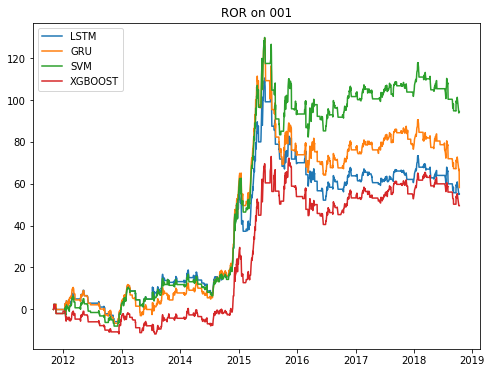

In [139]:
visualize_ror(df_dict, '001')

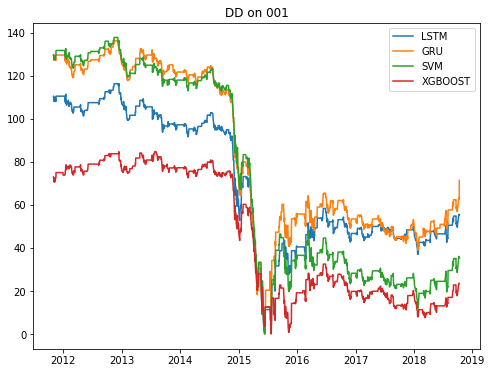

In [142]:
visualize_dd(df_dict, '001')

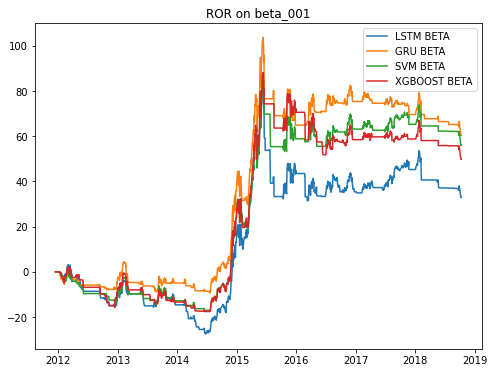

In [143]:
visualize_ror(df_dict, 'beta_001', True)

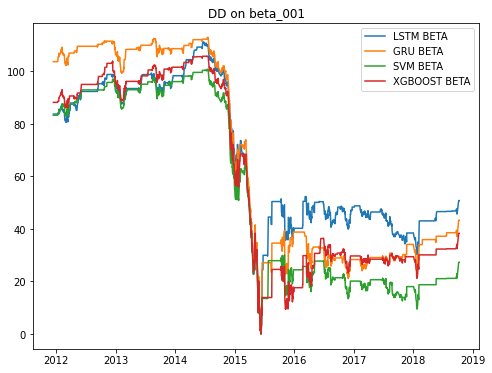

In [144]:
visualize_dd(df_dict, 'beta_001', True)

## ETH

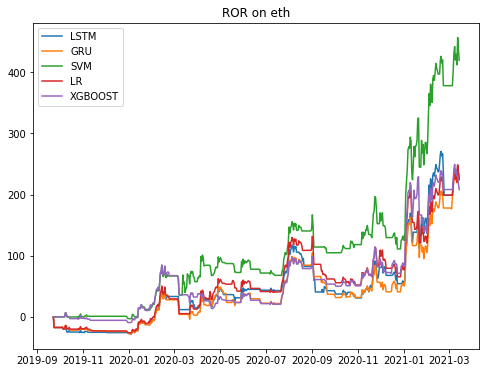

In [126]:
visualize_ror(df_dict, 'eth')

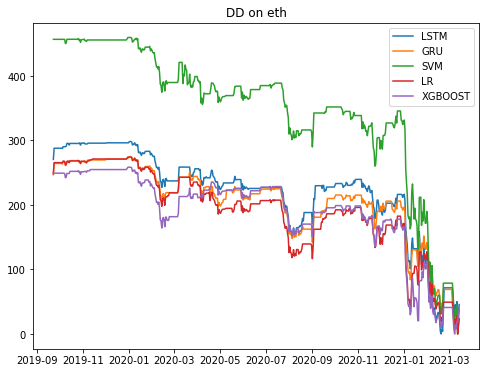

In [127]:
visualize_dd(df_dict, 'eth')

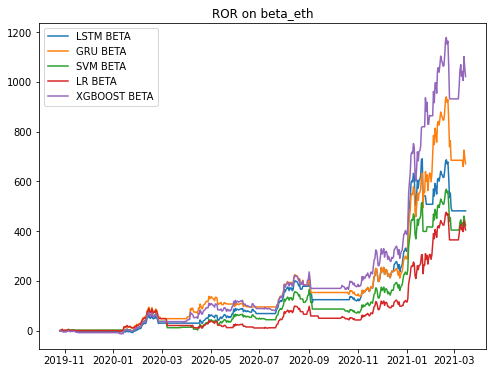

In [129]:
visualize_ror(df_dict, 'beta_eth', True)

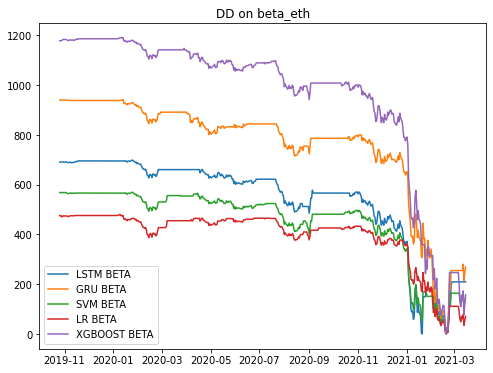

In [133]:
visualize_dd(df_dict, 'beta_eth', True)